In [2]:
# import
import random
import re
import sys
sys.setrecursionlimit(10000)

# For DEBUG
def check_print(*args):
    flag = 1
    for obj in args:
        for k, v in globals().items():
            if id(v) == id(obj):
                target = k
                break
        if flag == 1:
            out = target + ' = ' + str(obj)
            flag = 0
        else:
            out += ', ' + target + ' = ' + str(obj)
    print(out)

# リスト内包
even_numbers = [x for x in range(5) if x % 2 == 0]
squares = [x * x for x in range(5)]
even_squares = [x * x for x in even_numbers]
square_dict = { x : x * x for x in range(5) }
square_set = { x * x for x in [1, -1] }

    # リストの値が必要のない場合には慣例的にアンダースコア（ _ ）を使用する。
zeroes = [0 for _ in even_numbers]
pairs = [(x, y)
          for x in range(10)
          for y in range(10)]
increasing_pairs = [(x, y)
                     for x in range(10)
                     for y in range(x + 1, 10)]

# (Pseudo) random numbers 
# 'uniform_randoms(x, seed)' generates x  
def uniform_randoms(x = 1, seed = 0):
    random.seed(seed)
    return [random.random() for _ in range(x)]



In [4]:
# Object-oriented programming
class Set(object):
    def __init__(self, values = None):
        self.dict = {}        
        if values is not None:
            for value in values:
                self.add(value)
    
    def __repr__(self):
        return "Set: " + str(self.dict.keys())
    
    def add(self, value):
        self.dict[value] = True
    
    def contains(self, value):
        return value in self.dict
    
    def remove(self, value):
        del self.dict[value]

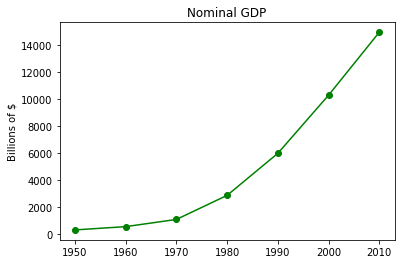

In [6]:
from matplotlib import pyplot as plt

years = [1950, 1960, 1970, 1980, 1990, 2000, 2010]
gdp = [300.2, 543.3, 1075.9, 2862.5, 5979.6, 10289.7, 14958.3]

plt.plot(years, gdp, color='green', marker='o', linestyle='solid')
plt.title("Nominal GDP")
plt.ylabel("Billions of $")
plt.show()

In [7]:
list1 = ['a', 'b', 'c']
list2 = [1, 2, 3]
pairs = list(zip(list1, list2))
check_print(pairs)
letters, numbers = zip(*pairs)
check_print(letters, numbers)
print()

def multiply(x, y):
    return x * y

products = list(map(multiply, [1, 2], [4, 5]))
xs = [1, 2, 3, 4]
x_product = reduce(multiply, xs)
check_print(products)
check_print(x_product)

pairs = [('a', 1), ('b', 2), ('c', 3)]
letters = ('a', 'b', 'c'), numbers = (1, 2, 3)



NameError: name 'reduce' is not defined

In [8]:
# Vector operations
import math

def vector_add(v, w):
    return [v_i + w_i for v_i, w_i in zip(v, w)]

def vector_subtract(v, w):
    return [v_i - w_i for v_i, w_i in zip(v, w)]

def vector_sum(vectors):
    result = vectors[0]
    for vector in vectors[1:]:
        result = vector_add(result, vector)
    return result

def scalar_multiply(c, v):
    return [c * v_i for v_i in v]

def vector_mean(vectors):
    n = len(vectors)
    return scalar_multiply(1/n, vector_sum(vectors))

def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    return dot(v, v)

def magnitude(v):
    return math.sqrt(sum_of_squares(v))

def squared_distance(v, w):
    return sum_of_squares(vector_subtract(v, w))

def distance(v, w):
    return math.sqrt(squared_distance(v, w))

In [9]:
# Matrix operation
def shape(A):
    num_rows = len(A)
    num_cols = len(A[0]) if A else 0
    return num_rows, num_cols

def get_row(A, i):
    return A[i-1]

def get_column(A, j):
    return [A_i[j-1] for A_i in A]

def make_matrix(num_rows, num_cols, entry_fn):
    return [[entry_fn(i, j) 
             for j in range(num_cols)]
            for i in range(num_rows)]

def is_diagnoal(i, j):
    return 1 if i == j else 0

def identity_matrix(n):
    def is_diagnoal(i, j):
        return 1 if i == j else 0
    
    return [[is_diagnoal(i, j)
             for j in range(n)]
            for i in range(n)]

def matrix_add(A, B):
    if shape(A) != shape(B):
        return None
    else:
        def vector_add(v, w):
            return [v_i + w_i for v_i, w_i in zip(v, w)]
    
        return [vector_add(a_i, b_i) for a_i, b_i in zip(A, B)]
    
def matrix_subtract(A, B):
    if shape(A) != shape(B):
        return None
    else:
        def vector_subtract(v, w):
            return [v_i - w_i for v_i, w_i in zip(v, w)]
    
        return [vector_subtract(a_i, b_i) for a_i, b_i in zip(A, B)]

def matrix_multiply(A, B):
    cols_A = len(A[0]) if A else 0
    rows_B = len(B)
    
    if cols_A != rows_B:
        print("Cannot multiply A with B")
    else:
        num_cols = len(B[0]) if B else 0
        num_rows = len(A)
    
        def is_element(i, j):
            element = 0
            for k in range(cols_A):
                element = element + A[i][k] * B[k][j]
            return element
    
        return [[is_element(i, j)
                 for j in range(num_cols)]
               for i in range(num_rows)]

In [10]:
# Statistics
# from __future__ import
from collections import Counter
import math

def mean(x):
    return sum(x) / len(x)

def median(v):
    n = len(v)
    sorted_v = sorted(v)
    midpoint = n // 2
    
    if n % 2 == 1:
        return sorted_v[midpoint]
    else:
        lo = midpoint - 1
        hi = midpoint
        return (sorted_v[lo] + sorted_v[hi]) / 2

def quantile(x, p):
    p_index = int(p * len(x))
    return sorted(x)[p_index]

def mode(x):
    counts = Counter(x)
    max_count = max(counts.values())
    return [x_i for x_i, count in counts.items()
            if count == max_count]

def data_range(x):
    return max(x) - min(x)

def de_mean(x):
    x_bar = mean(x)
    return [x_i - x_bar for x_i in x]

###### referring to "vector operation" ######
def dot(v, w):
    return sum(v_i * w_i for v_i, w_i in zip(v, w))

def sum_of_squares(v):
    return dot(v, v)
#############################################

def variance(x):
    n = len(x)
    deviations = de_mean(x)
    return sum_of_squares(deviations) / (n - 1)

def standard_deviation(x):
    return math.sqrt(variance(x))

def interquantile_range(x):
    return quantile(x, 0.75) - quantile(x, 0.25)

def covariance(x, y):
    n = len(x)
    return dot(de_mean(x), de_mean(y)) / (n - 1)

def correlation(x, y):
    stdev_x = standard_deviation(x)
    stdev_y = standard_deviation(y)
    return covariance(x, y) / stdev_x / stdev_y

In [11]:
# Probability
import math
import random
from matplotlib import pyplot as plt
from collections import Counter

def uniform_pdf(x):
    return 1 if x >= 0 and x < 1 else 0

def uniform_cdf(x):
    if x < 0: return 0
    elif x < 1: return x
    else: return 1
    
def normal_pdf(x, mu = 0, sigma = 1):
    sqrt_two_pi = math.sqrt(2 * math.pi)
    return (math.exp(- (x - mu) ** 2 / 2 / sigma ** 2) / (sqrt_two_pi * sigma))

def normal_cdf(x, mu = 0, sigma = 1):
    return (1 + math.erf((x - mu) / math.sqrt(2) / sigma)) / 2

def inverse_normal_cdf(p, mu = 0, sigma = 1, tolerance = 0.00001):
    if mu != 0 or sigma != 1:
        return mu + sigma * inverse_normal_cdf(p, tolerance = tolerance)
    
    low_z, low_p = -10.0, 0
    hi_z, hi_p = 10.0, 1
    while hi_z - low_z > tolerance:
        mid_z = (low_z + hi_z) / 2
        mid_p = normal_cdf(mid_z)
        
        if mid_p < p:
            low_z, low_p = mid_z, mid_p
        elif mid_p > p:
            hi_z, hi_p = mid_z, mid_p
        else:
            break
    
    return mid_z

def bernoulli_trial(p):
    return 1 if random.random() < p else 0

def binomial(n, p):
    return sum(bernoulli_trial(p) for _ in range(n))

def make_hist(p, n, num_points):
    
    data = [binomial(n, p) for _ in range(num_points)]
    
    histogram = Counter(data)
    plt.bar([x - 0.4 for x in histogram.keys()],
            [v / num_points for v in histogram.values()],
            0.8,
            color = '0.75')
    
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    
    xs = range(min(data), max(data) + 1)
    # 下の表記方法でも大丈夫な気がするが...
    # ys = [normal_pdf(i, mu, sigma), for i in xs]
    ys = [normal_cdf(i + 0.5, mu, sigma) - normal_cdf(i - 0.5, mu, sigma)
          for i in xs]
    plt.plot(xs, ys)
    plt.title("Binomial Distribution vs. Normal Approximation")
    plt.show()

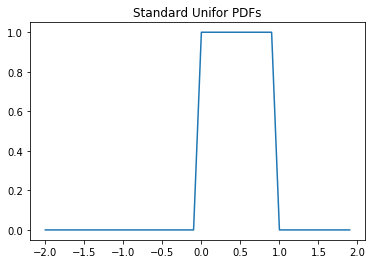

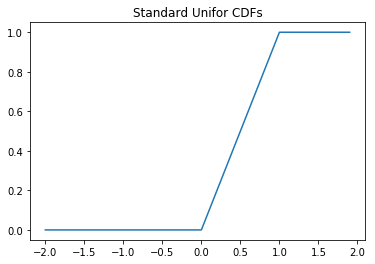

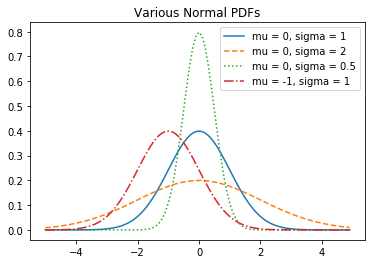

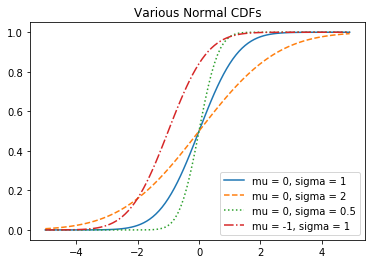

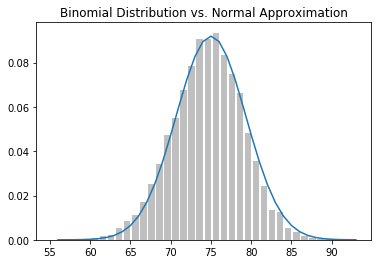

In [12]:
xs = [x / 10.0 for x in range(-20, 20)]
plt.plot(xs, [uniform_pdf(x) for x in xs], '-')
plt.title("Standard Unifor PDFs")
plt.show()

xs = [x / 10.0 for x in range(-20, 20)]
plt.plot(xs, [uniform_cdf(x) for x in xs], '-')
plt.title("Standard Unifor CDFs")
plt.show()

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_pdf(x, sigma = 1) for x in xs], '-', label = 'mu = 0, sigma = 1')
plt.plot(xs, [normal_pdf(x, sigma = 2) for x in xs], '--', label = 'mu = 0, sigma = 2')
plt.plot(xs, [normal_pdf(x, sigma = 0.5) for x in xs], ':', label = 'mu = 0, sigma = 0.5')
plt.plot(xs, [normal_pdf(x, mu = -1) for x in xs], '-.', label = 'mu = -1, sigma = 1')
plt.legend()
plt.title("Various Normal PDFs")
plt.show()

xs = [x / 10.0 for x in range(-50, 50)]
plt.plot(xs, [normal_cdf(x, sigma = 1) for x in xs], '-', label = 'mu = 0, sigma = 1')
plt.plot(xs, [normal_cdf(x, sigma = 2) for x in xs], '--', label = 'mu = 0, sigma = 2')
plt.plot(xs, [normal_cdf(x, sigma = 0.5) for x in xs], ':', label = 'mu = 0, sigma = 0.5')
plt.plot(xs, [normal_cdf(x, mu = -1) for x in xs], '-.', label = 'mu = -1, sigma = 1')
plt.legend(loc = 4)
plt.title("Various Normal CDFs")
plt.show()

make_hist(0.75, 100, 10000)

In [13]:
# Hypothesis and inference
def normal_approximation_to_binomial(n, p):
    mu = p * n
    sigma = math.sqrt(n * p * (1 - p))
    return mu, sigma

normal_probability_below = normal_cdf

def normal_probability_above(lo, mu = 0, sigma = 1):
    return 1 - normal_cdf(lo, mu, sigma)

def normal_probability_between(lo, hi, mu = 0, sigma = 1):
    return normal_cdf(hi, mu, sigma) - normal_cdf(lo, mu, sigma)

def normal_probability_outside(lo, hi, mu = 0, sigma = 1):
    return 1 - normal_probability_between(lo, hi, mu, sigma)

def normal_upper_bound(probability, mu = 0, sigma = 1):
    return inverse_normal_cdf(probability, mu = 0, sigma = 1)

def normal_lower_bound(probability, mu = 0, sigma = 1):
    return inverse_normal_cdf(1 - probability, mu = 0, sigma = 1)

def normal_two_sided_bounds(probability, mu = 0, sigma = 1):
    tail_probability = (1 - probability) / 2
    upper_bound = normal_lower_bound(tail_probability, mu, sigma)
    lower_bound = normal_upper_bound(tail_probability, mu, sigma)
    return lower_bound, upper_bound



In [14]:
def step(v, direction, step_size):
    """move step_size in the direction from v"""
    return [v_i + step_size * direction_i
            for v_i, direction_i in zip(v, direction)]

def safe(f):
    
    def safe_f(*args, **kwargs):
        try:
            return f(*args, **kwargs)
        except:
            return float('inf')
        
    return safe_f

def minimize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    """use gradient descent to find theta that minimizes target function"""

    step_sizes = [100, 10, 1, 0.1, 0.01, 0.001, 0.0001, 0.00001]

    theta = theta_0                           # set theta to initial value
    target_fn = safe(target_fn)               # safe version of target_fn
    value = target_fn(theta)                  # value we're minimizing

    while True:
        gradient = gradient_fn(theta)
        next_thetas = [step(theta, gradient, -step_size)
                       for step_size in step_sizes]

        # choose the one that minimizes the error function
        next_theta = min(next_thetas, key=target_fn)
        next_value = target_fn(next_theta)

        # stop if we're "converging"
        if abs(value - next_value) < tolerance:
            return theta
        else:
            theta, value = next_theta, next_value

def negate(f):
    """return a function that for any input x returns -f(x)"""
    return lambda *args, **kwargs: -f(*args, **kwargs)

def negate_all(f):
    """the same when f returns a list of numbers"""
    return lambda *args, **kwargs: [-y for y in f(*args, **kwargs)]

def maximize_batch(target_fn, gradient_fn, theta_0, tolerance=0.000001):
    return minimize_batch(negate(target_fn), negate_all(gradient_fn), theta_0, torelance)

data = [1, 2, 3, 4, 5]

def in_random_order(data):
    indexes = [i for i, _ in enumerate(data)]
    random.shuffle(indexes)
    for i in indexes:
        yield data[i]

def minimize_stochastic(target_fn, gradient_fn, x, y, theta_0, alpha_0=0.01):
    
    data = zip(x, y)
    theta = theta_0
    alpha = alpha_0
    min_theta, min_value = None, float("inf")
    iterations_with_no_improvement = 0
    
    while iterations_with_no_improvement < 100:
        value = sum( target_fn(x_i, y_i, theta) for x_i, y_i in data )
        
        if value < min_value:
            min_theta, min_value = theta, value
            iterations_with_no_improvement = 0
            alpha = alpha_0
            
        else:
            iterations_with_no_improvement += 1
            alpha *= 0.9
            
        for x_i, y_i in in_random_order(data):
            gradient_i = gradient_fn(x_i, y_i, theta)
            theta = vector_subtract(theta, sclar_multiply(alpha, gradient_i))
            
    return min_theta

In [15]:
def sum_of_squares(v):
    return sum(v_i ** 2 for v_i in v)

def sum_of_squares_gradient(v):
    return [2 * v_i for v_i in v]

v = [random.randint(-10,10) for i in range(3)]
f = negate_all(sum_of_squares_gradient)
print(f(v))
print(sum_of_squares(v))
print(sum_of_squares_gradient(v))

v = minimize_batch(sum_of_squares, sum_of_squares_gradient, v)

print(v)

[-10, -2, 8]
42
[10, 2, -8]
[0.001038459371706966, 0.0002076918743413932, -0.0008307674973655728]


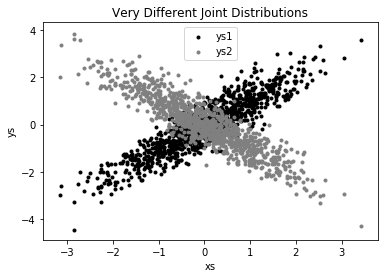

0.9042287555224362
-0.9078804843963041
[[1.0, -0.8125870039906686], [-0.8125870039906686, 1.0]]


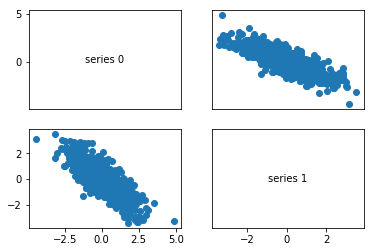

In [16]:
from collections import Counter, defaultdict
from functools import partial, reduce
import math, random, csv
import matplotlib.pyplot as plt
import dateutil.parser

def random_normal():
    return inverse_normal_cdf(random.random())

xs = [random_normal() for _ in range(1000)]
ys1 = [x + random_normal() / 2 for x in xs]
ys2 = [-x + random_normal() / 2 for x in xs]

plt.scatter(xs, ys1, marker='.', color='black', label='ys1')
plt.scatter(xs, ys2, marker='.', color='gray', label='ys2')
plt.xlabel('xs')
plt.ylabel('ys')
plt.legend(loc=9)
plt.title("Very Different Joint Distributions")
plt.show()

print(correlation(xs, ys1))
print(correlation(xs, ys2))

data = [[x + random_normal() / 2, -x + random_normal() / 2] for x in xs]

def correlation_matrix(data):
    """i列とj列のデータ間の相関を(i,j)の値とする、列数x列数の行列を返す"""
    _, num_columns = shape(data)
    def matrix_entry(i, j):
        return correlation(get_column(data, i), get_column(data, j))
    
    return make_matrix(num_columns, num_columns, matrix_entry)

print(correlation_matrix(data))

def make_scatterplot_matrix(data=None):
    
    if data == None:
        # first, generate some random data
        num_points = 100

        def random_row():
            row = [None, None, None, None]
            row[0] = random_normal()
            row[1] = -5 * row[0] + random_normal()
            row[2] = row[0] + row[1] + 5 * random_normal()
            row[3] = 6 if row[2] > -2 else 0
            return row
        random.seed(0)
        data = [random_row()
                for _ in range(num_points)]

    # then plot it

    _, num_columns = shape(data)
    fig, ax = plt.subplots(num_columns, num_columns)

    for i in range(num_columns):
        for j in range(num_columns):

            # scatter column_j on the x-axis vs column_i on the y-axis
            if i != j: ax[i][j].scatter(get_column(data, j), get_column(data, i))

            # unless i == j, in which case show the series name
            else: ax[i][j].annotate("series " + str(i), (0.5, 0.5),
                                    xycoords='axes fraction',
                                    ha="center", va="center")

            # then hide axis labels except left and bottom charts
            if i < num_columns - 1: ax[i][j].xaxis.set_visible(False)
            if j > 0: ax[i][j].yaxis.set_visible(False)

    # fix the bottom right and top left axis labels, which are wrong because
    # their charts only have text in them
    ax[-1][-1].set_xlim(ax[0][-1].get_xlim())
    ax[0][0].set_ylim(ax[0][1].get_ylim())

    plt.show()
    
make_scatterplot_matrix(data)

In [103]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import numpy.linalg as LA
import math
import sys
from scipy.stats import chi2, norm

def vce(C):
    eig_vals, eig_vecs = LA.eig(C)
    p = C.shape[1]    # number of parameters
    n = C.shape[0]
        
    v = np.empty((0,p))
    for i in range(p):
        v_i = np.zeros(p)
        
        for j in range(p):
            if i != j:
                u_ij = eig_vals[i] * eig_vals[j] / ((eig_vals[i] - eig_vals[j]) ** 2) / n
                v_ij = np.square(list(eig_vecs[j][i] for j in range(p)))
                v_i += u_ij * v_ij
 
        v = np.append(v, np.array([v_i]), axis=0)
    SE = np.sqrt(v / n)
    return SE

def PCA(target=[], eigenvalue=0, cummulative=1, cov=0):
    
    Variables = {'Variables': target}
    FactorLoading1 = DataFrame(Variables)
    FactorLoading2 = DataFrame(Variables)
    Eigenvectors = DataFrame(Variables)
    
    X = data[target].values   # Design matrix
    V = np.cov(X, rowvar=False)    # Covariance matrix
    R = np.corrcoef(X, rowvar=False)   # Correlation matrix
    p = X.shape[1]    # number of parameters
    n = X.shape[0]    # number of records
    
    ComponentResult = {'Component': ['Comp' + str(i + 1) for i in range(p)]}
    Component = DataFrame(ComponentResult)
    
    if cov == 0:

        eig_vals, eig_vecs = LA.eig(R)
        all_eig_vals = sum(eig_vals)

        if eig_vecs[0][0] < 0:
            eig_vecs = - eig_vecs
        
        print('Principal component/correlation')
        print('\n')
        
        Component['Eigenvalue'] = np.array([eig_vals[i] for i in range(p)])
        Component['Proportion'] = np.array([eig_vals[i] / all_eig_vals for i in range(p)])
        
        cumulative_contribution = 0
        CumulativeList = []
        for i in range(p):
            cumulative_contribution += eig_vals[i] / all_eig_vals
            CumulativeList.append(cumulative_contribution)    
        Component['Cumulative'] = np.array(CumulativeList)
        
        print(Component)
        print('\n')
        
        print('Principal component (all eigenvectors)')
        print('\n')
        
        for i in range(p):
            Eigenvectors['Comp ' + str(i + 1)] = list(eig_vecs[j][i] for j in range(p))
        
        print(Eigenvectors)
        print('\n')
        print('Principal component (eigenvalue > ' + str(eigenvalue) + ')')
        print('\n')
        
        SE = vce(R)

        for i in range(p):

            if eig_vals[i] > eigenvalue:
                FactorLoading_i = DataFrame(Variables)
                FactorLoading_i['Eigenvectors'] = np.array([eig_vecs[j][i] for j in range(p)])
                FactorLoading_i['Std. Err.'] = np.array([SE[j][i] for j in range(p)])
                FactorLoading_i['z'] = np.array([eig_vecs[j][i] / SE[j][i] for j in range(p)])
                FactorLoading_i['P > |z|'] = np.array([ norm.sf(abs(eig_vecs[j][i] * math.sqrt(eig_vals[i]) / SE[j][i]))*2
                                                                              for j in range(p)])
                FactorLoading_i['Factor loadings'] = np.array([eig_vecs[j][i] * math.sqrt(eig_vals[i])
                                                                 for j in range(p)])
            else:
                break
            print('Component' + str(i + 1))
            print(FactorLoading_i)
            print('\n')
    
        print('Prinipal component (cumulative level: ' + str(cummulative) + ')')
        print('\n')
        
        cumulative_contribution = 0
    
        for i in range(p):
                
            if cumulative_contribution < cummulative:
                FactorLoading_i = DataFrame(Variables)
                FactorLoading_i['Eigenvectors'] = np.array([eig_vecs[j][i] for j in range(p)])
                FactorLoading_i['Std. Err.'] = np.array([SE[j][i] for j in range(p)])
                FactorLoading_i['z'] = np.array([eig_vecs[j][i] / SE[j][i] for j in range(p)])
                FactorLoading_i['P > |z|'] = np.array([ norm.sf(abs(eig_vecs[j][i] * math.sqrt(eig_vals[i]) / SE[j][i]))*2
                                                                              for j in range(p)])
                FactorLoading_i['Factor loadings'] = np.array([eig_vecs[j][i] * math.sqrt(eig_vals[i])
                                                                 for j in range(p)])
                cumulative_contribution += eig_vals[i] / all_eig_vals
            
            else:
                break
            
            print('Component' + str(i + 1))
            print(FactorLoading_i)
            print('\n')
        
            independence = - ( n - (2 * p + 5) / 6) * math.log(LA.det(R))
            df = p * (p-1) / 2
            print( 'LR test for independence: chi' + '('+ str(df) + ') = ' + str(independence) 
                  + '  Prob > chi2 = ' +str(chi2.sf(independence, df, loc=0, scale=1)) )
        
            D = np.diag(eig_vals)
            sphericity = - ( n - ( 2*p**2 + p + 2) / 6 /p) * (math.log(LA.det(D)) - p * math.log(np.trace(D)/p)) 
            df = (p+2)*(p-1)/2
            print( 'LR test for sphericity: chi' + '('+ str(df) + ') = ' + str(sphericity) 
                  + '  Prob > chi2 = ' +str(chi2.sf(sphericity, df, loc=0, scale=1)) )
            
    elif cov == 1:
        
        eig_vals, eig_vecs = LA.eig(V)
        all_eig_vals = sum(eig_vals)
        
        if eig_vecs[0][0] < 0:
            eig_vecs = - eig_vecs

        print('Principal component/covariance')
        print('\n')
        
        Component['Eigenvalue'] = np.array([eig_vals[i] for i in range(p)])
        Component['Proportion'] = np.array([eig_vals[i] / all_eig_vals for i in range(p)])
        
        cumulative_contribution = 0
        CumulativeList = []
        for i in range(p):
            cumulative_contribution += eig_vals[i] / all_eig_vals
            CumulativeList.append(cumulative_contribution)    
        Component['Cumulative'] = np.array(CumulativeList)
        
        print(Component)
        print('\n')
        
        print('Principal component (all eigenvectors)')
        print('\n')
        
        for i in range(p):
            Eigenvectors['Comp ' + str(i + 1)] = list(eig_vecs[j][i] for j in range(p))
        
        print(Eigenvectors)
        print('\n')
        print('Principal component (eigenvalue > ' + str(eigenvalue) + ')')
        print('\n')

        SE = vce(V)
        for i in range(len(eig_vals)):
        
            if eig_vals[i] > eigenvalue:
                FactorLoading_i = DataFrame(Variables)
                FactorLoading_i['Eigenvectors'] = np.array([eig_vecs[j][i] for j in range(p)])
                FactorLoading_i['Std. Err.'] = np.array([SE[j][i] for j in range(p)])
                FactorLoading_i['z'] = np.array([eig_vecs[j][i] / SE[j][i] for j in range(p)])
                FactorLoading_i['P > |z|'] = np.array([ norm.sf(abs(eig_vecs[j][i] * math.sqrt(eig_vals[i]) / SE[j][i]))*2
                                                                              for j in range(p)])
                FactorLoading_i['Factor loadings'] = np.array([eig_vecs[j][i] * math.sqrt(eig_vals[i] / V[j][j])
                                                                 for j in range(len(eig_vals))])
            
            else:
                break
            
            print('Component' + str(i + 1))
            print(FactorLoading_i)
            print('\n')
    
        print('Prinipal component (cumulative level: ' + str(cummulative) + ')')
        print('\n')
    
        cumulative_contribution = 0
    
        for i in range(len(eig_vals)):
                
            if cumulative_contribution < cummulative:
                FactorLoading_i = DataFrame(Variables)
                FactorLoading_i['Eigenvectors'] = np.array([eig_vecs[j][i] for j in range(p)])
                FactorLoading_i['Std. Err.'] = np.array([SE[j][i] for j in range(p)])
                FactorLoading_i['z'] = np.array([eig_vecs[j][i] / SE[j][i] for j in range(p)])
                FactorLoading_i['P > |z|'] = np.array([ norm.sf(abs(eig_vecs[j][i] * math.sqrt(eig_vals[i]) / SE[j][i]))*2
                                                                              for j in range(p)])
                FactorLoading_i['Factor loadings'] = np.array([eig_vecs[j][i] * math.sqrt(eig_vals[i] / V[j][j])
                                                                 for j in range(len(eig_vals))])
                cumulative_contribution += eig_vals[i] / all_eig_vals
            
            else:
                break
            
            print('Component' + str(i + 1))
            print(FactorLoading_i)
            print('\n')
        
            independence = - ( n - (2 * p + 5) / 6) * math.log(LA.det(V))
            df = p * (p-1) / 2
            print( 'LR test for independence: chi' + '('+ str(df) + ') = ' + str(independence) 
                  + '  Prob > chi2 = ' +str(chi2.sf(independence, df, loc=0, scale=1)) )
        
            D = np.diag(eig_vals)
            sphericity = - ( n - ( 2*p**2 + p + 2) / 6 /p) * (math.log(LA.det(D)) - p * math.log(np.trace(D)/p)) 
            df = (p+2)*(p-1)/2
            print( 'LR test for sphericity: chi' + '('+ str(df) + ') = ' + str(sphericity) 
                  + '  Prob > chi2 = ' +str(chi2.sf(sphericity, df, loc=0, scale=1)) )
    
    else:
        print('Error')

if __name__ == '__main__':
    
    data = pd.read_csv("testdata2.csv")
    target = ['Japanese','Math','English','Science','Sociology']
    eigenvalue=1
    cummulative=0.8
    cov=0
    PCA(target,eigenvalue, cummulative, cov)

Principal component/correlation


  Component  Eigenvalue  Proportion  Cumulative
0     Comp1    2.875535    0.575107    0.575107
1     Comp2    1.194020    0.238804    0.813911
2     Comp3    0.416236    0.083247    0.897158
3     Comp4    0.290079    0.058016    0.955174
4     Comp5    0.224130    0.044826    1.000000


Principal component (all eigenvectors)


   Variables    Comp 1    Comp 2    Comp 3    Comp 4    Comp 5
0   Japanese  0.464411  0.406153 -0.261232  0.684713  0.286860
1       Math  0.364799 -0.630381  0.364070  0.429168 -0.390908
2    English  0.511046  0.081152  0.594234 -0.373219  0.489735
3    Science  0.410842 -0.494651 -0.661502 -0.324890  0.208306
4  Sociology  0.470410  0.431734 -0.092263 -0.319590 -0.694025


Principal component (eigenvalue > 1)


Component1
   Variables  Eigenvectors  Std. Err.         z       P > |z|  Factor loadings
0   Japanese      0.464411   0.118535  3.917906  3.058011e-11         0.787520
1       Math      0.364799   0.134564  2.710966

In [137]:
import numpy as np
import pandas as pd

data = np.asarray([[0.9526, -0.246, -0.8856],[0.5639, 0.2379, 0.9104]])

data * 10

data + data

data.shape
data.dtype

data1 = [6, 7.5, 8, 0, 1]
arr1 = np.array(data1)
arr1

data2 = [[1, 2, 3, 4], [5, 6, 7, 8]]
arr2 = np.array(data2)
arr2

arr2.ndim
arr2.shape

np.identity(10)

array([[ 1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.,  0.],
       [ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  1.]])